# Titanic - Machine Learning Solution with Visualizations


In this notebook, we will solve the Titanic prediction problem using various machine learning models and extensive visualizations.

### Steps:
1. Load and explore the data with visualizations.
2. Data cleaning and preprocessing.
3. Feature engineering.
4. Model training and evaluation using multiple algorithms.
5. Final predictions and preparation of the submission file.


## 1. Load and Explore the Data

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display first few rows of the dataset
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizing Missing Values

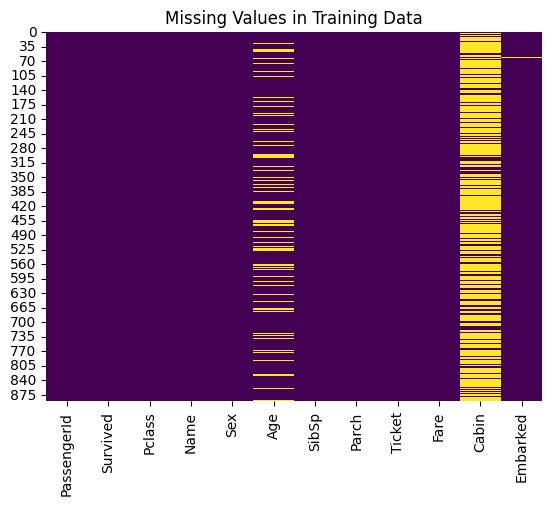

In [2]:

# Visualize missing values
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Training Data")
plt.show()


### Survival Distribution

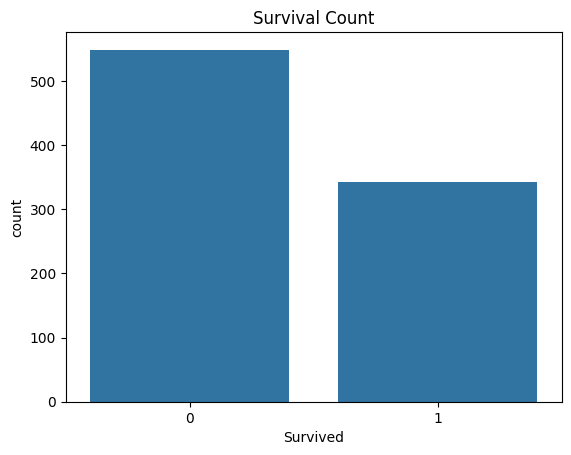

In [3]:

# Plot the distribution of survived
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()


### Survival vs Sex

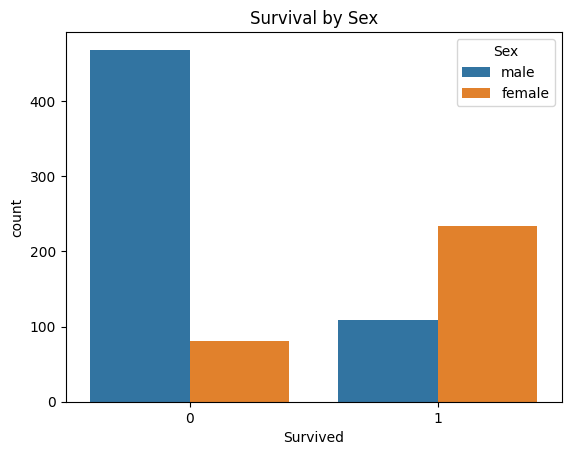

In [4]:

# Plot survival rate by sex
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title("Survival by Sex")
plt.show()


### Survival vs Passenger Class

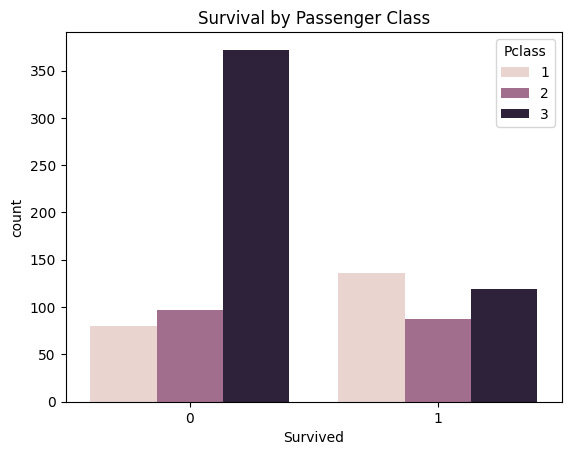

In [5]:

# Plot survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title("Survival by Passenger Class")
plt.show()


### Age Distribution of Survivors and Non-Survivors

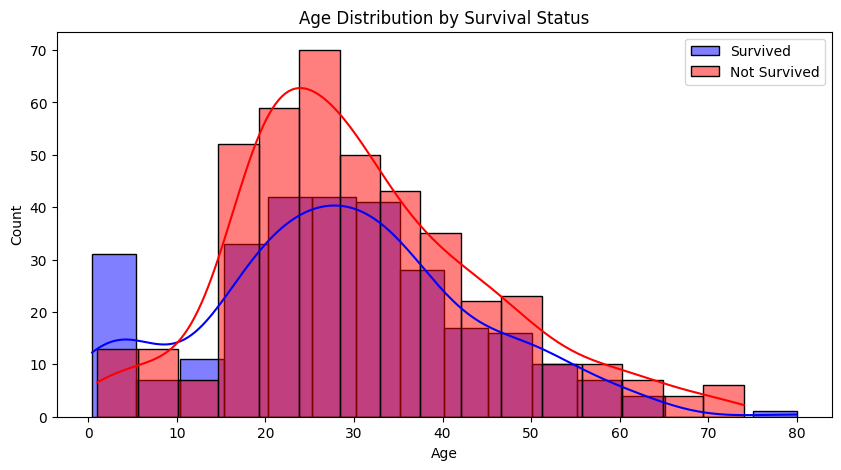

In [6]:

# Plot age distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df[train_df['Survived'] == 1]['Age'].dropna(), color='blue', kde=True, label='Survived')
sns.histplot(train_df[train_df['Survived'] == 0]['Age'].dropna(), color='red', kde=True, label='Not Survived')
plt.legend()
plt.title("Age Distribution by Survival Status")
plt.show()


## 2. Data Preprocessing

In [7]:

from sklearn.preprocessing import LabelEncoder

# Fill missing values for 'Age' and 'Fare' with median values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Fill 'Embarked' missing values with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' and 'Embarked' to numerical values
label = LabelEncoder()
train_df['Sex'] = label.fit_transform(train_df['Sex'])
test_df['Sex'] = label.transform(test_df['Sex'])

train_df['Embarked'] = label.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label.transform(test_df['Embarked'])

# Drop unnecessary columns
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_passenger_ids = test_df['PassengerId']
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


<ipython-input-7-b9bb0f6c1101>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-7-b9bb0f6c1101>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

## 3. Feature Engineering

In [8]:

# Create new feature 'FamilySize' by adding 'SibSp' and 'Parch' features
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

# Drop 'SibSp' and 'Parch' as they are now represented by 'FamilySize'
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)


## 4. Model Training and Evaluation

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Split data into training and validation sets
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


Logistic Regression Accuracy: 0.8045
Random Forest Accuracy: 0.8268
Gradient Boosting Accuracy: 0.8045
XGBoost Accuracy: 0.7821


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:20:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## 5. Final Prediction and Submission

In [10]:

# Use best model to predict on the test set
predictions = best_model.predict(test_df)

# Prepare submission file
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': predictions
})

# Save to CSV for submission
submission.to_csv('submission.csv', index=False)
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1



### Summary
In this notebook, we explored the Titanic dataset with visualizations, performed data preprocessing, engineered new features, trained multiple models, and selected the best-performing model for predictions.

Further improvements could include advanced feature engineering, hyperparameter tuning, and trying additional models.
